In [95]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings(action='ignore')

In [96]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/0518_data.csv'
df = pd.read_csv(csvFile)
df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,2,경기도,평택시,125.0,21.0,4,PSCI거더교,B,DB-24,37,5,25.0,21443.0
1,풍계교,3,경기도,이천시,55.0,20.0,2,RC슬래브교,B,DB-24,27,4,15.0,5654.0
2,태평교,3,경기도,여주시,43.8,19.5,4,PSCI거더교,B,DB-24,32,2,21.9,8750.0
3,장평교,2,경기도,이천시,105.0,19.5,4,RC슬래브교,B,DB-24,30,7,15.0,14150.0
4,덕평교,3,경기도,여주시,32.0,10.0,2,RC슬래브교,B,DB-24,27,2,16.0,3739.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5680 non-null   object 
 1   시설물종별등급구분  5680 non-null   object 
 2   시도         5680 non-null   object 
 3   시군구        5680 non-null   object 
 4   교량연장       5680 non-null   float64
 5   교량폭        5680 non-null   float64
 6   차로수        5680 non-null   int64  
 7   상부구조형식     5680 non-null   object 
 8   최종안전점검결과   5680 non-null   object 
 9   설계활하중      5680 non-null   object 
 10  준공후경과년수    5680 non-null   int64  
 11  경간수        5680 non-null   int64  
 12  최대경간장      5680 non-null   float64
 13  교통량        5680 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 621.4+ KB


In [98]:
def encode_features(df):
    features = ['시설물종별등급구분', '최종안전점검결과', '상부구조형식', '설계활하중']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [99]:
bridge_df = encode_features(df)
bridge_df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,1,경기도,평택시,125.0,21.0,4,0,1,2,37,5,25.0,21443.0
1,풍계교,2,경기도,이천시,55.0,20.0,2,6,1,2,27,4,15.0,5654.0
2,태평교,2,경기도,여주시,43.8,19.5,4,0,1,2,32,2,21.9,8750.0
3,장평교,1,경기도,이천시,105.0,19.5,4,6,1,2,30,7,15.0,14150.0
4,덕평교,2,경기도,여주시,32.0,10.0,2,6,1,2,27,2,16.0,3739.0


In [100]:
# 필요없는 변수 제외(교량명, 시군구, 위도, 경도 등)
bridge_df = df.drop(['교량명', '시도', '시군구', '시설물종별등급구분', '차로수','설계활하중', '상부구조형식',
                     '최대경간장'], axis = 1)
bridge_df.head()

,교량연장,교량폭,최종안전점검결과,준공후경과년수,경간수,교통량
0,125.0,21.0,1,37,5,21443.0
1,55.0,20.0,1,27,4,5654.0
2,43.8,19.5,1,32,2,8750.0
3,105.0,19.5,1,30,7,14150.0
4,32.0,10.0,1,27,2,3739.0


* 중요요인으로 꼽았던 경과년수, 설계활하중, 교량연장만 모델링에 사용

In [101]:
y_bridge_df = bridge_df['최종안전점검결과']
X_bridge_df = bridge_df.drop(['최종안전점검결과'], axis = 1)

In [102]:
X_bridge_df.shape

(5680, 5)

In [103]:
y_bridge_df.shape

(5680,)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_bridge_df, y_bridge_df, test_size = 0.3, random_state = 12)

In [110]:
rf_clf = RandomForestClassifier(random_state = 12, max_depth = 9, min_samples_leaf = 2, min_samples_split = 6)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.3f}'.format(accuracy))

랜덤 포레스트 정확도: 0.866


In [106]:
# from sklearn.tree import export_graphviz
# import graphviz
# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# # 첫번째 결정 트리 추출
# tree = rf_clf.estimators_[0]
# dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns,
#                            filled=True, rounded=True, impurity=  True, special_characters=True, fontname='NanumGothic')

# # 그래프 생성
# graph = graphviz.Source(dot_data)

# # 그래프 출력
# graph.format = 'png'
# graph.render("randomforest_tree4")

In [107]:
# graph.format = 'pdf'
# graph.render("randomforest_tree4")

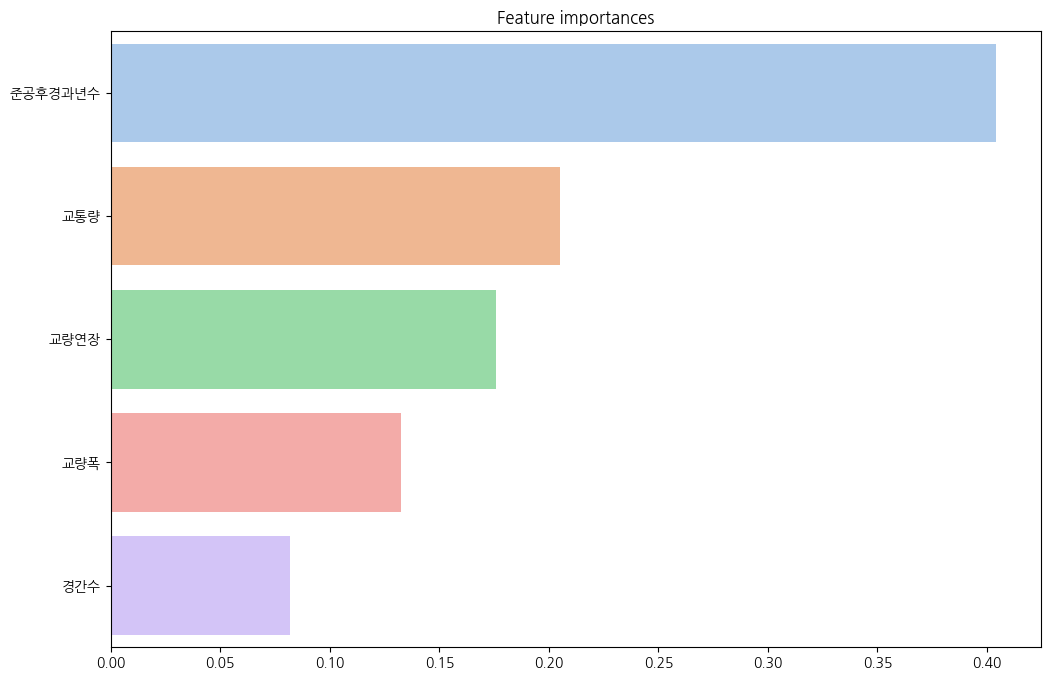

In [111]:
# 중요요인 시각화
ftr_importances_values = rf_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending = False)
plt.figure(figsize = (12, 8))
plt.title('Feature importances')
sns.barplot(x = ftr_top, y = ftr_top.index,  palette = 'pastel')
plt.show()

In [114]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns

# 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 중요도 기준으로 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False, ignore_index=True)

# 중요도 출력
top5_importance = importance_df.head(5)
top5_importance

,Feature,Importance
0,준공후경과년수,0.404297
1,교통량,0.205108
2,교량연장,0.175943
3,교량폭,0.132716
4,경간수,0.081936
